In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# Create the image generators (takes the folders with images and makes labels)
# Apply rescale
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:

train_generator = train_datagen.flow_from_directory(
        'training_set',
        color_mode="grayscale",
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'test_set',
        color_mode="grayscale",
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    image = np.reshape(image, (200,200))
    plt.imshow(image)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# VGG-1 ARHITECTURE 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding="same",
                 activation='relu',
                 input_shape=(200,200,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv

In [6]:
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=50,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
126/126 [==============================] - 26s 205ms/step - loss: 0.6887 - acc: 0.5330 - val_loss: 0.6844 - val_acc: 0.5087
Epoch 2/50
126/126 [==============================] - 22s 177ms/step - loss: 0.6776 - acc: 0.5764 - val_loss: 0.6665 - val_acc: 0.6149
Epoch 3/50
126/126 [==============================] - 66s 525ms/step - loss: 0.6591 - acc: 0.6166 - val_loss: 0.7108 - val_acc: 0.5195
Epoch 4/50
126/126 [==============================] - 89s 704ms/step - loss: 0.6545 - acc: 0.6135 - val_loss: 0.6396 - val_acc: 0.6377
Epoch 5/50
126/126 [==============================] - 23s 182ms/step - loss: 0.6394 - acc: 0.6291 - val_loss: 0.6388 - val_acc: 0.6352
Epoch 6/50
126/126 [==============================] - 22s 178ms/step - loss: 0.6253 - acc: 0.6477 - val_loss: 0.6274 - val_acc: 0.6515
Epoch 7/50
126/126 [==============================] - 22s 178ms/step - loss: 0.6171 - acc: 0.6588 - val_loss: 0.6084 - val_acc: 0.6733
Epoch 8

(1, 200, 200, 1)
[[1.3200271e-05]]


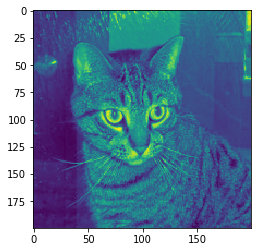

In [26]:
import cv2 
img = cv2.imread('training_set\cats\cat.1.jpg',0) 
img = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA) 
img = img /255 
plt.imshow(img)
img = np.reshape(img, (1,200,200,1))
print(img.shape)
result = model.predict(img) 
print(result)

(1, 200, 200, 1)
[[0.9997824]]


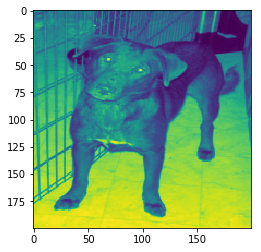

In [27]:
img = cv2.imread('training_set\dogs\dog.1.jpg',0) 
img = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA) 
img = img /255 
plt.imshow(img)
img = np.reshape(img, (1,200,200,1))
print(img.shape)
result = model.predict(img) 
print(result)

doggo


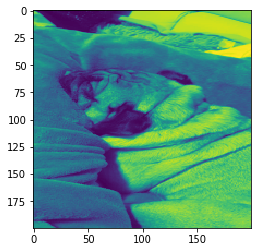

In [29]:
img = cv2.imread('pug.jpg',0) 
img = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA) 
img = img /255 
plt.imshow(img)
img = np.reshape(img, (1,200,200,1))
result = model.predict(img) 
if result < 0.5:
    print("Beautiful cato")
else:
    print("Good doggo")